In [1]:
from datetime import datetime, timedelta
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import sys
sys.path.append("../")
from function_modis import fig_with_map

# 1. input for DANN

inpath_nc = '/HDD/global/EAC4_pm2p5_aod550/global_2019-2022.nc'
inpath_refer = '/HDD/global/refer/refer-{}.npy'
# inpath_pred = '/DATA/global-emission-1/pred/nlag1_{}h/pred-{}.npy'
inpath_pred = "/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_{}/pred-{}.npy"
# satellite data
inpath_satellite = "/DATA/NASA/MOYD08-combined/satellite-{}.npy"
# update
# inpath_da = '/DATA/figure_data/nlag1_{}h/da-{}.npy'
inpath_da = '/DATA/dann_test_2018_tempo/da-{}.npy'
# load parameters
filename = inpath_nc
nc_file = nc.Dataset(filename)
lon = nc_file.variables['longitude'][:]
lat = nc_file.variables['latitude'][:]
lon_mesh, lat_mesh = np.meshgrid(lon, lat)

start = datetime(2019, 1, 1, 12, 0, 0)
ahead = int(2*24/3)

current = start + timedelta(hours=ahead*3)

# refer
# pred 
filename = inpath_refer.format(current.strftime('%Y%m%d%H'))
print(filename)
refer = np.load(filename)

# pred 
filename = inpath_pred.format(start.strftime('%Y%m%d%H'), current.strftime('%Y%m%d%H'))
print(filename)
pred = np.load(filename)

# satellite
filename = inpath_satellite.format(current.strftime('%Y%m%d%H'))
obs = np.load(filename)
obs =  np.roll(obs, 240, axis=1)

# update
filename = inpath_da.format(current.strftime('%Y%m%d%H'))
update = np.load(filename)
print(filename)

/HDD/global/refer/refer-2019010312.npy
/DATA/global-emission-2_11-17_iniCAMS_iAOD/pred/start_2019010112/pred-2019010312.npy
/DATA/dann_test_2018_tempo/da-2019010312.npy


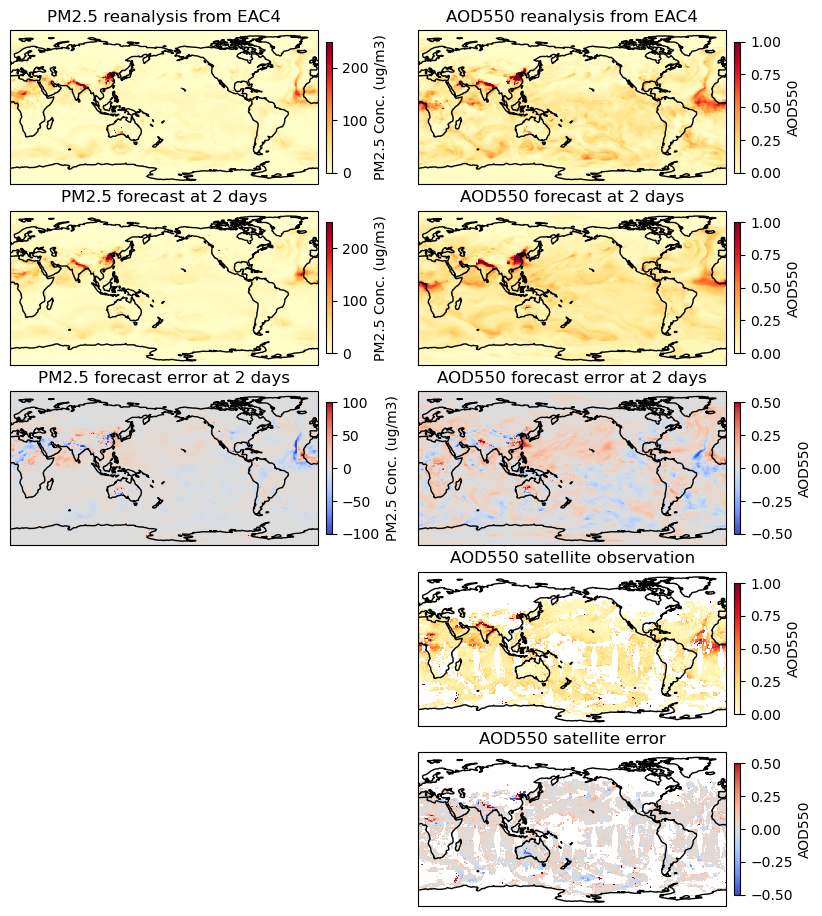

In [6]:

# Calculate the size in pixels at 300 DPI
# Set figure size in millimeters
fig_width_mm = 220  # specify the width in millimeters
fig_height_mm = 250  # specify the height in millimeters

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig = plt.figure(figsize=(fig_width_inches,fig_height_inches))
icmap = 'YlOrRd'

nrows = 5
ncols = 2

# --------------------------------------------------------------
ilabel = 'PM2.5 Conc. (ug/m3)' #'Temperature (K)'
vmin = 0
vmax = 250
# figure 1: predict
ax = fig.add_subplot(nrows, ncols, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('PM2.5 reanalysis from EAC4')

im = ax.pcolormesh(lon_mesh-180, lat_mesh, refer[...,0]*1e9, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

vmax = 1
ilabel = 'AOD550' #'Temperature (K)'
vmax = 1
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 reanalysis from EAC4')

im = ax.pcolormesh(lon_mesh-180, lat_mesh, refer[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

# ---------------------------------------------------------------
ilabel = 'PM2.5 Conc. (ug/m3)'
vmax = 250
# figure 1: predict
ax = fig.add_subplot(nrows, ncols, 3, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('PM2.5 forecast at {} days'.format(int(ahead*3/24)))

im = ax.pcolormesh(lon_mesh-180, lat_mesh, pred[...,0]*1e9, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

ilabel = 'AOD550' #'Temperature (K)'
vmax = 1
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 4, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 forecast at {} days'.format(int(ahead*3/24)))

im = ax.pcolormesh(lon_mesh-180, lat_mesh, pred[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

# ---------------------------------------------------------------
ilabel = 'PM2.5 Conc. (ug/m3)'
vmin = - 100; vmax = 100
icmap ='coolwarm'
# figure 1: predict
ax = fig.add_subplot(nrows, ncols, 5, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('PM2.5 forecast error at {} days'.format(int(ahead*3/24)))

im1 = ax.pcolormesh(lon_mesh-180, lat_mesh, (pred[...,0]-refer[...,0])*1e9, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

ilabel = 'AOD550' #'Temperature (K)'
vmin = -0.5; vmax =0.5
icmap ='coolwarm'
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 6, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 forecast error at {} days'.format(int(ahead*3/24)))

im1 = ax.pcolormesh(lon_mesh-180, lat_mesh, (pred[...,1]-refer[...,1]), cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

# ---------------------------------------------------------------
vmin =0; vmax=1
icmap = 'YlOrRd'
# satellite
ax = fig.add_subplot(nrows, ncols, 8, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 satellite observation')

ax.pcolormesh(lon_mesh-180, lat_mesh, obs, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

# ---------------------------------------------------------------

ilabel = 'AOD550' #'Temperature (K)'
vmin = -0.5; vmax =0.5
icmap ='coolwarm'
# satellite
ax = fig.add_subplot(nrows, ncols, 10, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 satellite error')

ax.pcolormesh(lon_mesh-180, lat_mesh, obs-refer[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1)

filename = '/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/DANN_input_2days.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

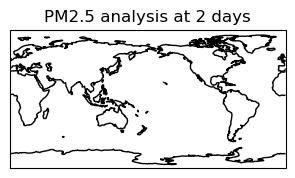

In [9]:
# DANN results


# Calculate the size in pixels at 300 DPI
# Set figure size in millimeters
fig_width_mm = 220  # specify the width in millimeters
fig_height_mm = 100  # specify the height in millimeters

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig = plt.figure(figsize=(fig_width_inches,fig_height_inches))
icmap = 'YlOrRd'

nrows = 2
ncols = 2

# ---------------------------------------------------------------
ilabel = 'PM2.5 Conc. (ug/m3)'
vmin = 0
vmax = 250
# figure 1: predict
ax = fig.add_subplot(nrows, ncols, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('PM2.5 analysis at {} days'.format(int(ahead*3/24)))

im = ax.pcolormesh(lon_mesh-180, lat_mesh, update[...,0]*1e9, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

ilabel = 'AOD550' #'Temperature (K)'
vmax = 1
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 analysis at {} days'.format(int(ahead*3/24)))

im = ax.pcolormesh(lon_mesh-180, lat_mesh, update[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

# ---------------------------------------------------------------
ilabel = 'PM2.5 Conc. (ug/m3)'
vmin = - 100; vmax = 100
icmap ='coolwarm'
# figure 1: predict
ax = fig.add_subplot(nrows, ncols, 3, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('PM2.5 analysis error at {} days'.format(int(ahead*3/24)))

im1 = ax.pcolormesh(lon_mesh-180, lat_mesh, (update[...,0]-refer[...,0])*1e9, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

ilabel = 'AOD550' #'Temperature (K)'
vmin = -0.5; vmax =0.5
icmap ='coolwarm'
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 4, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 analyis error at {} days'.format(int(ahead*3/24)))

im1 = ax.pcolormesh(lon_mesh-180, lat_mesh, (update[...,1]-refer[...,1]), cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label(ilabel)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1)
# 
# filename = '/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures/DANN_output_2days.png'
# plt.savefig(filename, dpi=300, bbox_inches='tight')
# plt.show()

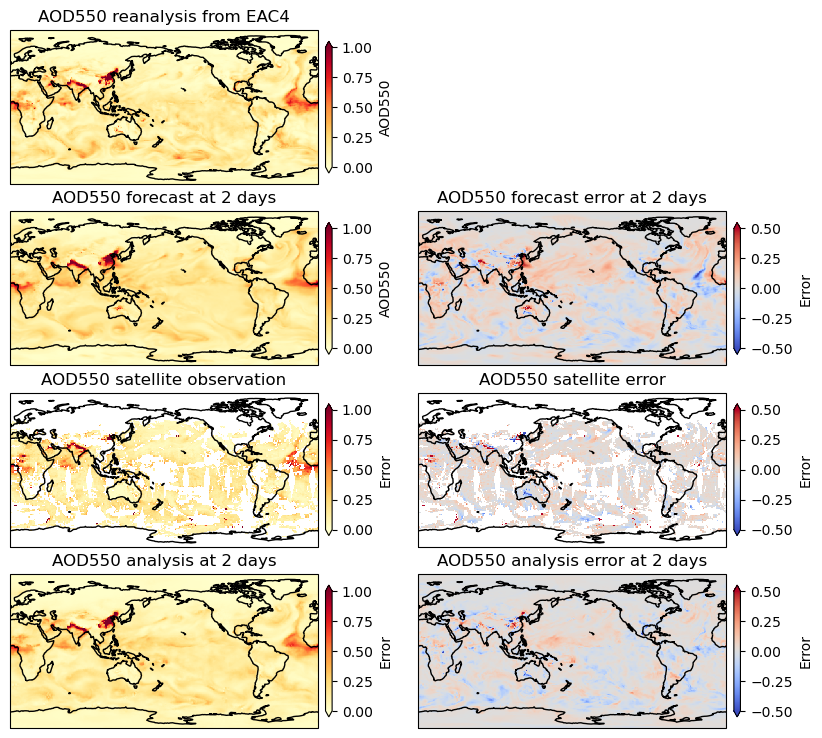

In [6]:

# Calculate the size in pixels at 300 DPI
# Set figure size in millimeters
fig_width_mm = 220  # specify the width in millimeters
fig_height_mm = 200  # specify the height in millimeters

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig = plt.figure(figsize=(fig_width_inches,fig_height_inches))
icmap = 'YlOrRd'

nrows = 4
ncols = 2

ilabel = 'AOD550' #'Temperature (K)'
vmin = 0
vmax = 1
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 reanalysis from EAC4')

im = ax.pcolormesh(lon_mesh-180, lat_mesh, refer[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02, extend='both')
cbar.set_label(ilabel)

ilabel = 'AOD550' #'Temperature (K)'
vmax = 1
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 3, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 forecast at {} days'.format(int(ahead*3/24)))

im = ax.pcolormesh(lon_mesh-180, lat_mesh, pred[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02, extend='both')
cbar.set_label(ilabel)

ilabel = 'Error' #'Temperature (K)'
vmin = -0.5; vmax =0.5
icmap ='coolwarm'
# figure 2: predict
ax = fig.add_subplot(nrows, ncols, 4, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 forecast error at {} days'.format(int(ahead*3/24)))

im1 = ax.pcolormesh(lon_mesh-180, lat_mesh, (pred[...,1]-refer[...,1]), cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02, extend='both')
cbar.set_label(ilabel)

# ---------------------------------------------------------------
vmin =0; vmax=1
icmap = 'YlOrRd'
# satellite
ax = fig.add_subplot(nrows, ncols, 5, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 satellite observation')

ax.pcolormesh(lon_mesh-180, lat_mesh, obs, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02, extend='both')
cbar.set_label(ilabel)

# ---------------------------------------------------------------

ilabel = 'Error' #'Temperature (K)'
vmin = -0.5; vmax =0.5
icmap ='coolwarm'
# satellite
ax = fig.add_subplot(nrows, ncols, 6, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 satellite error')

ax.pcolormesh(lon_mesh-180, lat_mesh, obs-refer[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02, extend='both')
cbar.set_label(ilabel)


# ---------------------------------------------------------------
vmin =0; vmax=1
icmap = 'YlOrRd'
# satellite
ax = fig.add_subplot(nrows, ncols, 7, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 analysis at 2 days')

ax.pcolormesh(lon_mesh-180, lat_mesh, update, cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, shrink=0.8, pad=0.02, extend='both')
cbar.set_label(ilabel)

# ---------------------------------------------------------------

ilabel = 'Error' #'Temperature (K)'
vmin = -0.5; vmax =0.5
icmap ='coolwarm'
# satellite
ax = fig.add_subplot(nrows, ncols, 8, projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
ax.coastlines(color='k')
ax.set_title('AOD550 analysis error at 2 days')

ax.pcolormesh(lon_mesh-180, lat_mesh, update-refer[...,1], cmap=icmap, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im1, ax=ax, shrink=0.8, pad=0.02, extend='both')
cbar.set_label(ilabel)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.1, hspace=0.1)

filename = '/home/sc3020/OneDrive/Paper/Paper4/Nature/submittion2/Figures2_iAOD/DANN_input_output_2days.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()